In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

In [3]:
trainpath='/content/gdrive/MyDrive/YBIGTA_CreditAI/open/train.csv'
testpath='/content/gdrive/MyDrive/YBIGTA_CreditAI/open/test.csv'
valpath='/content/gdrive/MyDrive/YBIGTA_CreditAI/open/val.csv'
submissionpath= '/content/gdrive/MyDrive/YBIGTA_CreditAI/open/sample_submission.csv'

train=pd.read_csv(trainpath)
test=pd.read_csv(testpath)
val=pd.read_csv(valpath)
submission=pd.read_csv(submissionpath)

In [4]:
train = train.drop(columns=['ID'])
val_class = val.Class
val = val.drop(columns=['ID', 'Class'])
test = test.drop(columns=['ID'])

In [ ]:
# SMOTE를 써보자!
# validation을 거의 완벽히 분류하는 기준을 찾아보자.

In [18]:
sum((val.V14 + val.V17 + 10) > 0)

28444

In [19]:
sum((val.V14 + val.V17 + 10) < 0)

18

In [24]:
train['Class'] = ((train.V14 + train.V17 + 10) < 0)

In [27]:
train['Class'] = train['Class'].astype(int)

In [28]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960,0
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901,0
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,...,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857,0
113838,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,...,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881,0
113839,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904,0
113840,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939,0


In [31]:
sum(train.Class)

92

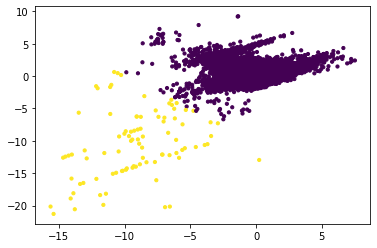

In [29]:
plt.scatter(train['V14'], train['V17'], c=train.Class, s=10)
plt.show()

In [30]:
from imblearn.over_sampling import SMOTE

In [32]:
sm = SMOTE(random_state=42)

In [33]:
trainX_resampled, trainY_resampled = sm.fit_resample(train.drop(columns=['Class']), train.Class)

In [34]:
trainX_resampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227495,-2.870317,1.002704,-3.929599,4.235764,1.158891,-2.211052,-4.689516,1.282881,-3.242726,-5.228506,...,0.985849,0.007671,-0.008208,-0.468530,0.351525,-0.049075,0.969862,0.584658,-0.242253,0.326006
227496,-13.136956,7.380241,-18.219379,10.584352,-11.780569,-3.635695,-14.857328,8.832773,-5.479335,-13.229996,...,2.759896,-0.261749,-0.413578,0.519940,-0.702859,-0.161592,-2.474822,-0.721608,0.206915,0.091424
227497,-2.130029,1.393243,-0.610282,1.097765,-1.145266,-0.779364,-2.004996,0.578112,-0.990660,-2.506929,...,0.689873,0.718471,-0.159213,-0.044114,0.267863,-0.459835,-0.385126,-0.143749,-0.037942,-0.419416
227498,-1.278324,2.445764,-2.816353,2.337650,-1.357786,-0.952941,-3.054281,1.160062,-2.255877,-4.852642,...,0.648861,0.077456,-0.223092,-0.512078,0.224557,0.744227,0.630954,0.249745,-0.307275,-0.325846


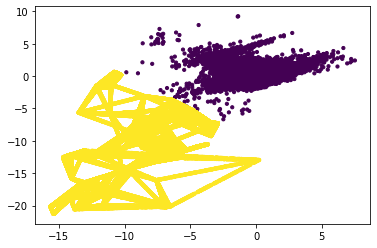

In [35]:
plt.scatter(trainX_resampled['V14'], trainX_resampled['V17'], c=trainY_resampled, s=10)
plt.show()

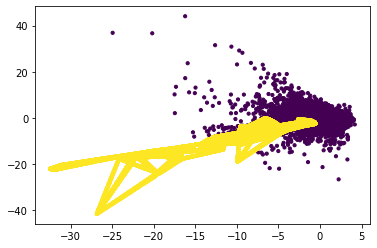

In [36]:
plt.scatter(trainX_resampled['V3'], trainX_resampled['V7'], c=trainY_resampled, s=10)
plt.show()

In [39]:
from lightgbm import LGBMClassifier

In [40]:
lgbm = LGBMClassifier()

In [41]:
lgbm.fit(trainX_resampled, trainY_resampled)

LGBMClassifier()

In [42]:
train_pred = lgbm.predict(trainX_resampled)

In [44]:
f1_score(trainY_resampled, train_pred, average='macro')

1.0

In [46]:
val_pred = lgbm.predict(val)

In [47]:
f1_score(val_class, val_pred, average='macro')

0.8845098845450512